### RFM Analysis

#### Import necessary modules

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
plt.rcParams.update({'figure.figsize': (7, 5), 'figure.dpi': 100})
sns.set_style("whitegrid")
sns.set()

### Read cleaned data and load into dataframe

In [2]:
df = pd.read_csv("dataUK.csv")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
344485,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,09/12/11 12:31,1.95,15804.0,United Kingdom
344486,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,09/12/11 12:49,2.95,13113.0,United Kingdom
344487,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,09/12/11 12:49,1.25,13113.0,United Kingdom
344488,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,09/12/11 12:49,8.95,13113.0,United Kingdom


## Lets perform Data Wrangling

### Lets change data type of InvoiceDate feature

In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344490 entries, 0 to 344489
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      344490 non-null  int64         
 1   StockCode    344490 non-null  object        
 2   Description  344490 non-null  object        
 3   Quantity     344490 non-null  int64         
 4   InvoiceDate  344490 non-null  datetime64[ns]
 5   Price        344490 non-null  float64       
 6   Customer ID  344490 non-null  float64       
 7   Country      344490 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 21.0+ MB


### Also change data type of Customer ID feature

In [4]:
df['Customer ID'] = df['Customer ID'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344490 entries, 0 to 344489
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      344490 non-null  int64         
 1   StockCode    344490 non-null  object        
 2   Description  344490 non-null  object        
 3   Quantity     344490 non-null  int64         
 4   InvoiceDate  344490 non-null  datetime64[ns]
 5   Price        344490 non-null  float64       
 6   Customer ID  344490 non-null  int64         
 7   Country      344490 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 21.0+ MB


### Add a new feature 'Total Cost'

In [5]:
df["Total Price"] = df["Quantity"] * df["Price"]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
344485,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-09-12 12:31:00,1.95,15804,United Kingdom,23.40
344486,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-09-12 12:49:00,2.95,13113,United Kingdom,23.60
344487,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-09-12 12:49:00,1.25,13113,United Kingdom,30.00
344488,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-09-12 12:49:00,8.95,13113,United Kingdom,214.80


### Dimensions of dataset

In [6]:
df.shape

(344490, 9)

In [7]:
df["Total Price"].describe()

count    344490.000000
mean         21.084526
std         330.649250
min           0.000000
25%           4.250000
50%          10.500000
75%          17.850000
max      168469.600000
Name: Total Price, dtype: float64

### So average amount of total price is 21.
### Only 25 % customers spend more than 17.85

### Distribution of Total Price to check spendings of customers

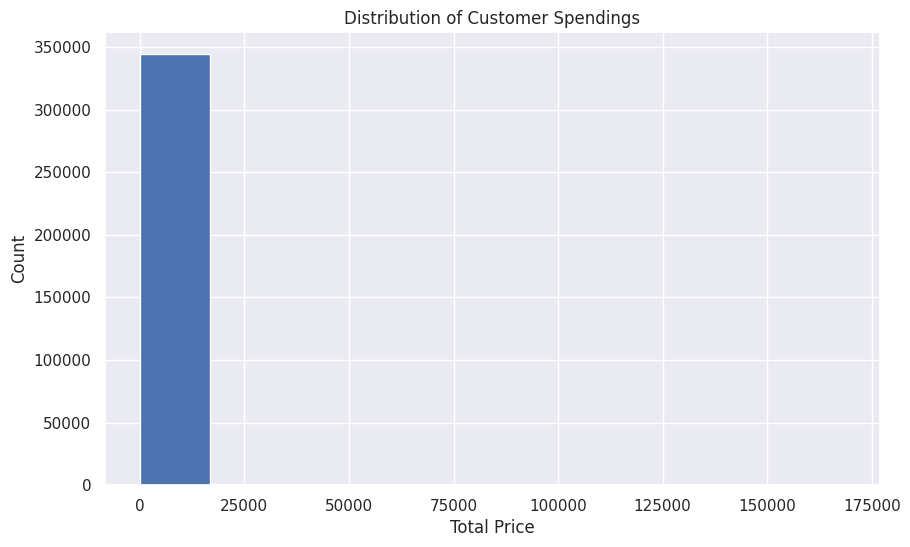

In [8]:
plt.figure(figsize=(10, 6))
df["Total Price"].hist()
plt.gca().set(title="Distribution of Customer Spendings",
              xlabel="Total Price", ylabel="Count")
plt.show()

## We can see here that most of the customers have spendings less than 20000

### Lets get the last date on which order was taken

In [9]:
df.sort_values(by="InvoiceDate", ascending=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
246827,570876,46000S,POLYESTER FILLER PAD 40x40cm,1,2011-12-10 17:19:00,1.45,16085,United Kingdom,1.45
246838,570876,23322,LARGE WHITE HEART OF WICKER,3,2011-12-10 17:19:00,2.95,16085,United Kingdom,8.85
246828,570876,46000M,POLYESTER FILLER PAD 45x45cm,1,2011-12-10 17:19:00,1.55,16085,United Kingdom,1.55
246829,570876,23394,POSTE FRANCE CUSHION COVER,1,2011-12-10 17:19:00,3.75,16085,United Kingdom,3.75
246830,570876,23396,LE JARDIN BOTANIQUE CUSHION COVER,1,2011-12-10 17:19:00,3.75,16085,United Kingdom,3.75
...,...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850,United Kingdom,25.50


In [10]:
start_date = df["InvoiceDate"].min()
end_date = df["InvoiceDate"].max()

print(f"Start date: {start_date}")
print(80*'-')
print(f"End date: {end_date}")

Start date: 2010-01-12 08:26:00
--------------------------------------------------------------------------------
End date: 2011-12-10 17:19:00


### Since the last recent date is 2011-12-10, lets take a snapshot date as 2011-12-11

In [11]:
snapshot_date = end_date+dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-11 17:19:00')

### Now lets take data of one year period i.e. we have recency of 365 days.

### Aggregating data on Customer level

In [12]:
rfm_data = df.groupby(['Customer ID'], as_index=False).agg({
    'InvoiceDate': lambda d: (snapshot_date - d.max()).days,
    'Invoice': 'count',
    'Total Price': 'sum'}).rename(columns={'InvoiceDate': 'Recency',                                                                     'Invoice': 'Frequency', 'Total Price': 'MonetaryValue'})

In [13]:
rfm_data.head(10).style.background_gradient(cmap="Blues")

,Customer ID,Recency,Frequency,MonetaryValue
0,12346,327,1,77183.600000
1,12747,24,103,4196.010000
2,12748,5,4243,32449.900000
3,12749,24,199,4090.880000
4,12820,46,59,942.340000
5,12821,97,6,92.720000
6,12822,72,46,948.880000
7,12823,76,5,1759.500000
8,12824,31,25,397.120000
9,12826,61,91,1474.720000


### Now lets find out R, F, M scores

#### Lets find out quantiles form above rfm data

In [14]:
quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
segmented_rfm_data = rfm_data

#### Write functions for R score and FM score

In [15]:
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [16]:
segmented_rfm_data['R'] = segmented_rfm_data['Recency'].apply(
    RScore, args=('Recency', quantiles,))
segmented_rfm_data['F'] = segmented_rfm_data['Frequency'].apply(
    FMScore, args=('Frequency', quantiles,))
segmented_rfm_data['M'] = segmented_rfm_data['MonetaryValue'].apply(
    FMScore, args=('MonetaryValue', quantiles,))
segmented_rfm_data.head()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M
0,12346,327,1,77183.60,1,1,4
1,12747,24,103,4196.01,3,4,4
2,12748,5,4243,32449.90,4,4,4
3,12749,24,199,4090.88,3,4,4
4,12820,46,59,942.34,3,3,3


### Now lets get RFM segment value and total RFM score for each customer

#### The RFM_segment is just concatenation of individual R,F,M scores 
####  The RFM_Score is calculated by summing up the RFM quartile metrics

In [17]:
# Lets find first RFM_segment
segmented_rfm_data["RFM_segment"] = segmented_rfm_data["R"].map(str) + \
    segmented_rfm_data["F"].map(str)+segmented_rfm_data["M"].map(str)
segmented_rfm_data

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
0,12346,327,1,77183.60,1,1,4,114
1,12747,24,103,4196.01,3,4,4,344
2,12748,5,4243,32449.90,4,4,4,444
3,12749,24,199,4090.88,3,4,4,344
4,12820,46,59,942.34,3,3,3,333
...,...,...,...,...,...,...,...,...
3916,18280,161,10,180.60,2,1,1,211
3917,18281,5,7,80.82,4,1,1,411
3918,18282,217,12,178.05,1,1,1,111
3919,18283,11,688,1998.68,4,4,4,444


In [18]:
# Now lets find total RFM_Score
segmented_rfm_data["RFM_score"] = segmented_rfm_data["R"] + \
    segmented_rfm_data["F"]+segmented_rfm_data["M"]
segmented_rfm_data

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
0,12346,327,1,77183.60,1,1,4,114,6
1,12747,24,103,4196.01,3,4,4,344,11
2,12748,5,4243,32449.90,4,4,4,444,12
3,12749,24,199,4090.88,3,4,4,344,11
4,12820,46,59,942.34,3,3,3,333,9
...,...,...,...,...,...,...,...,...,...
3916,18280,161,10,180.60,2,1,1,211,4
3917,18281,5,7,80.82,4,1,1,411,6
3918,18282,217,12,178.05,1,1,1,111,3
3919,18283,11,688,1998.68,4,4,4,444,12


### Since total RFM_score ranges from minimum combination 3 i.e. 1+1+1 to maximum combination 12 i.e. 4+4+4
### So we can now analyze these RFM_score

In [19]:
segmented_rfm_data.groupby('RFM_score').agg({'Recency': 'mean',
                                             'Frequency': 'mean',
                                             'MonetaryValue': ['mean', 'count']})

Recency   Frequency MonetaryValue      
                 mean        mean          mean count
RFM_score                                            
3          287.736334    7.469453    145.693666   311
4          205.100287   13.710602    223.278711   349
5          170.686071   20.646570    337.896447   481
6          120.211329   27.782135    625.595580   459
7           96.851948   38.563636   1260.774675   385
8           70.800000   52.672093   1025.424909   430
9           56.671309   76.047354   1379.544237   359
10          42.979849  119.511335   1884.010479   397
11          26.532637  184.122715   4040.337990   383
12          11.318801  359.501362   8102.200790   367

### From above summary statistics , it is clear that
### The customers with 
### lowest RFM scores have the highest recency value and the lowest frequency and monetary value, and vice-versa is applicable.

 ### So we can create segments from these values of RFM_score 3–12 manually  and create some categories as follows

<b>
    
    if RFM_score >= 9 :
                 Top 
    else if RFM_score < 9 && RFM_score > =5:
                 Middle
    else:
                 Low
</b>

### So now lets create segments stated as above

In [20]:
# Lets write function for generating segments
def generate_segment(data):
    if data["RFM_score"] > 9:
        return "Top"
    elif data["RFM_score"] >= 5 and data["RFM_score"] < 9:
        return "Middle"
    else:
        return "Low"


# Lets apply above function to newly created feature called "segment"
segmented_rfm_data["Segment"] = segmented_rfm_data.apply(generate_segment,axis=1)
segmented_rfm_data

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,Segment
0,12346,327,1,77183.60,1,1,4,114,6,Middle
1,12747,24,103,4196.01,3,4,4,344,11,Top
2,12748,5,4243,32449.90,4,4,4,444,12,Top
3,12749,24,199,4090.88,3,4,4,344,11,Top
4,12820,46,59,942.34,3,3,3,333,9,Low
...,...,...,...,...,...,...,...,...,...,...
3916,18280,161,10,180.60,2,1,1,211,4,Low
3917,18281,5,7,80.82,4,1,1,411,6,Middle
3918,18282,217,12,178.05,1,1,1,111,3,Low
3919,18283,11,688,1998.68,4,4,4,444,12,Top


### Get the summary of Segments we created

In [21]:
segmented_rfm_data.groupby('Segment').agg({'Recency': 'mean',
                                             'Frequency': 'mean',
                                             'MonetaryValue': ['mean', 'count']})

Recency   Frequency MonetaryValue      
               mean        mean          mean count
Segment                                            
Low      178.028459   33.767419    606.959157  1019
Middle   116.814245   34.290028    784.049871  1755
Top       27.357454  217.874455   4593.643679  1147

In [22]:
segmented_rfm_data.groupby('Segment')[["Recency","Frequency","MonetaryValue"]].describe()

Recency                                                          \
          count        mean         std  min   25%    50%    75%    max   
Segment                                                                   
Low      1019.0  178.028459  140.944945  1.0  62.0  166.0  261.5  698.0   
Middle   1755.0  116.814245  101.949843  1.0  42.0   84.0  170.0  698.0   
Top      1147.0   27.357454   27.033291  1.0  11.0   19.0   33.0  161.0   

        Frequency              ...                MonetaryValue               \
            count        mean  ...    75%     max         count         mean   
Segment                        ...                                             
Low        1019.0   33.767419  ...   47.0   300.0        1019.0   606.959157   
Middle     1755.0   34.290028  ...   45.0   364.0        1755.0   784.049871   
Top        1147.0  217.874455  ...  247.5  7523.0        1147.0  4593.643679   

                                                                      
                  std     min       25%      50%       75%       max  
Segment                                                               
Low       1141.440062    3.75   144.900   248.08   760.015   26626.8  
Middle    4662.936806    0.00   304.875   451.44   706.840  168472.5  
Top      12082.648942  302.10  1477.425  2317.22  3941.510  259657.3  

[3 rows x 24 columns]

## So this was our simple rough model that we build by creating 3 categories from interpretation of RFM scores.
## For more accurate analysis , lets perform Clustering on this segmented_rfm_data

In [25]:
# Lets save this RFM data to csv
segmented_rfm_data.to_csv("segmented_rfm_data.csv",index=False)